In [119]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 20)

In [120]:
df = pd.read_csv("../data/clean/clean_data.csv")

In [121]:
df.shape

(14727, 38)

In [122]:
df.head()

,id,price,isFurnished,type,subtype,region,province,district,locality,postalCode,street,number,box,floor,latitude,longitude,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,condition,hasLift,kitchen,hasGarden,gardenSurface,hasTerrace,terraceSurface,land,hasSwimmingPool,bathroomCount,toiletCount,parkingCountIndoor,primaryEnergyConsumptionPerSqm,epcScore,heatingType,bookmarkCount,viewCount
0,10617274,180000.0,NaN,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,Vosselaar,2350.0,Heieinde,62,NaN,NaN,51.302538,4.883080,3.0,148.0,1955.0,3.0,NaN,TO_RENOVATE,NaN,NaN,False,NaN,False,NaN,280.0,False,1.0,1.0,0.0,520.0,F,GAS,7.0,1638.0
1,10485868,205186.0,NaN,APARTMENT,APARTMENT,Wallonie,Hainaut,Mouscron,Mouscron,7700.0,Rue du Bilemont 13,NaN,NaN,1.0,50.736136,3.215874,2.0,98.0,NaN,NaN,NaN,NaN,False,NaN,False,NaN,True,11.0,NaN,False,NaN,NaN,0.0,0.0,NaN,NaN,2.0,313.0
2,10355016,330000.0,NaN,APARTMENT,APARTMENT,Brussels,Brussels,Brussels,Uccle,1180.0,rue Victor Gambier,21,NaN,4.0,50.801612,4.334257,2.0,100.0,NaN,2.0,5.0,GOOD,True,NOT_INSTALLED,False,NaN,True,9.0,NaN,False,1.0,1.0,0.0,317.0,F,NaN,23.0,2503.0
3,10617204,225000.0,False,HOUSE,HOUSE,Flanders,Antwerp,Antwerp,Boom,2850.0,Kapelstraat,150,NaN,NaN,51.084302,4.385862,4.0,180.0,1956.0,2.0,NaN,AS_NEW,NaN,INSTALLED,False,NaN,True,NaN,78.0,False,1.0,NaN,0.0,247.0,C,NaN,52.0,3248.0
4,10485969,699000.0,False,APARTMENT,PENTHOUSE,Flanders,West Flanders,Veurne,Nieuwpoort,8620.0,Oude Veurnevaart,82,NaN,2.0,51.125638,2.752077,2.0,135.0,2011.0,NaN,4.0,NaN,True,NaN,True,NaN,True,NaN,NaN,False,1.0,1.0,0.0,108.0,B,NaN,12.0,2104.0


In [123]:
df.dtypes

id                                  int64
price                             float64
isFurnished                        object
type                               object
subtype                            object
region                             object
province                           object
district                           object
locality                           object
postalCode                        float64
street                             object
number                             object
box                                object
floor                             float64
latitude                          float64
longitude                         float64
bedroomCount                      float64
netHabitableSurface               float64
constructionYear                  float64
facadeCount                       float64
floorCount                        float64
condition                          object
hasLift                            object
kitchen                           

In [124]:
# impute missing values
df[['isFurnished', 'hasLift']] = df[['isFurnished', 'hasLift']].fillna(False)
df[['gardenSurface', 'terraceSurface', 'land']] = df[['gardenSurface', 'terraceSurface', 'land']].fillna(0)

In [125]:
# impute bool to int
bool_col = df.select_dtypes(include='bool').columns
df[bool_col] = df[bool_col].astype(int)
df[bool_col].head()

,isFurnished,hasLift,hasGarden,hasTerrace,hasSwimmingPool
0,0,0,0,0,0
1,0,0,0,1,0
2,0,1,0,1,0
3,0,0,0,1,0
4,0,1,1,1,0


In [126]:

col_to_drop = df.select_dtypes(include='object').columns.difference(['type'])
df.drop(col_to_drop, axis=1, inplace=True)

col_to_drop = ['id', 'postalCode', 'latitude', 'longitude', 'facadeCount', 'floorCount', 'bookmarkCount', 'viewCount', 'constructionYear']
df.drop(col_to_drop, axis=1, inplace=True)

In [127]:
df.isna().sum()

price                                0
isFurnished                          0
type                                 0
floor                             7143
bedroomCount                         0
netHabitableSurface                  0
hasLift                              0
hasGarden                            0
gardenSurface                        0
hasTerrace                           0
terraceSurface                       0
land                                 0
hasSwimmingPool                      0
bathroomCount                     1704
toiletCount                       3406
parkingCountIndoor                   0
primaryEnergyConsumptionPerSqm    2828
dtype: int64

In [128]:
df.dropna(subset=['bathroomCount', 'toiletCount', 'primaryEnergyConsumptionPerSqm'], inplace=True)
df.shape


(8461, 17)

In [129]:
X = df['primaryEnergyConsumptionPerSqm'].to_numpy()
y = df['price'].to_numpy()
y

array([180000., 330000., 699000., ..., 283000., 245000., 319000.])

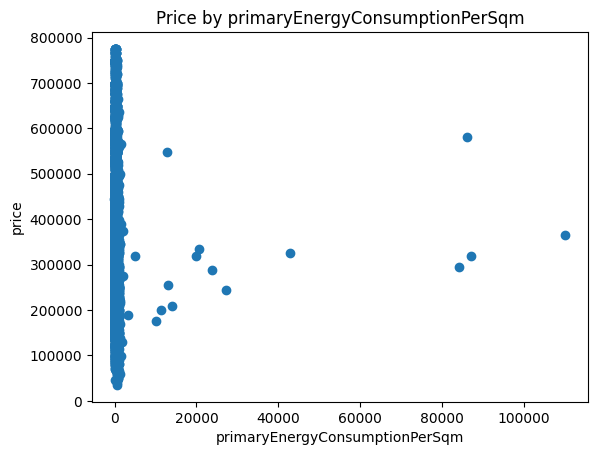

In [130]:
from matplotlib import pyplot as plt

plt.scatter(X, y)
plt.title('Price by primaryEnergyConsumptionPerSqm')
plt.xlabel('primaryEnergyConsumptionPerSqm')
plt.ylabel('price')
plt.show()

In [131]:
energy_last_precentile = df['primaryEnergyConsumptionPerSqm'].quantile(.95)
energy_last_precentile

679.0

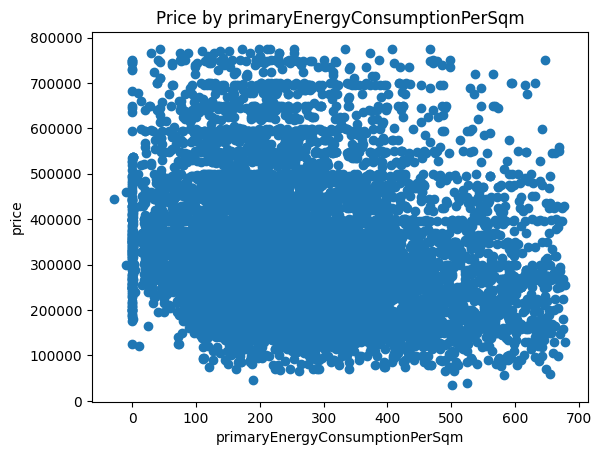

In [132]:
df_energy = df.drop(df[df['primaryEnergyConsumptionPerSqm'] > energy_last_precentile].index)

X = df_energy['primaryEnergyConsumptionPerSqm'].to_numpy()
y = df_energy['price'].to_numpy()


plt.scatter(X, y)
plt.title('Price by primaryEnergyConsumptionPerSqm')
plt.xlabel('primaryEnergyConsumptionPerSqm')
plt.ylabel('price')
plt.show()

In [133]:
df['price'].corr(df['primaryEnergyConsumptionPerSqm'])

-0.010463056009268544

In [134]:
df.columns

Index(['price', 'isFurnished', 'type', 'floor', 'bedroomCount',
       'netHabitableSurface', 'hasLift', 'hasGarden', 'gardenSurface',
       'hasTerrace', 'terraceSurface', 'land', 'hasSwimmingPool',
       'bathroomCount', 'toiletCount', 'parkingCountIndoor',
       'primaryEnergyConsumptionPerSqm'],
      dtype='object')

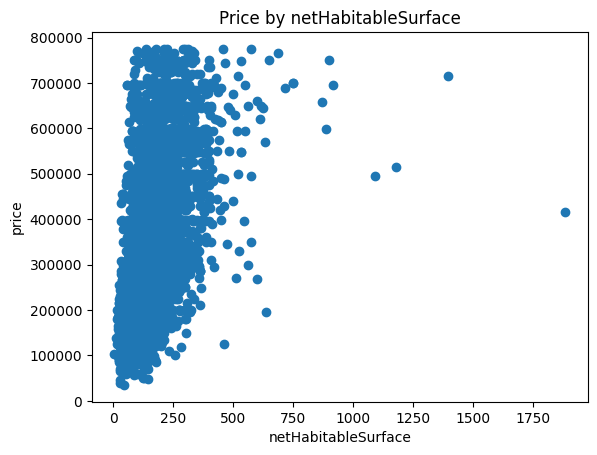

In [135]:
X = df['netHabitableSurface'].to_numpy()
y = df['price'].to_numpy()

plt.scatter(X, y)
plt.title('Price by netHabitableSurface')
plt.xlabel('netHabitableSurface')
plt.ylabel('price')
plt.show()

In [136]:
df['price'].corr(df['netHabitableSurface'])

0.536855389992738

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train.shape


(6768,)

In [138]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = X_train.reshape(-1, 1)

X_train.shape


(6768, 1)

In [139]:
model.fit(X_train, y_train)

LinearRegression()

In [140]:
model.score(X_train, y_train)

0.300909019408108

In [146]:
X_test = X_test.reshape(-1,1)

In [147]:
X_test.shape

(1693, 1)

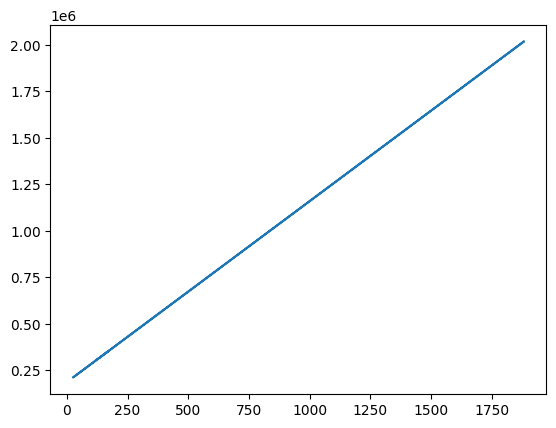

In [149]:
y_pred = model.predict(X_test)
y_pred.shape
plt.plot(X_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

